In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/Workspace/Users/tulasivaliveti123@gmail.com/flights_preprocessed.csv")
df.head(10)



,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour,DepMinute,DepDatetime,Month,Hour,Route,DepDateTime,ArrDateTime,CRSArrDateTime
0,Thursday,2019-01-03,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,18,29,2019-01-03 18:29:00,1,18,IND-BWI,2019-01-03 18:29:00,2019-01-03 19:59:00,2019-01-03 19:25:00
1,Thursday,2019-01-03,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,19,37,2019-01-03 19:37:00,1,19,IND-LAS,2019-01-03 19:37:00,2019-01-03 20:37:00,2019-01-03 19:40:00
2,Thursday,2019-01-03,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,16,44,2019-01-03 16:44:00,1,16,IND-MCO,2019-01-03 16:44:00,2019-01-03 18:45:00,2019-01-03 17:25:00
3,Thursday,2019-01-03,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,14,52,2019-01-03 14:52:00,1,14,IND-PHX,2019-01-03 14:52:00,2019-01-03 16:40:00,2019-01-03 16:25:00
4,Thursday,2019-01-03,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,13,23,2019-01-03 13:23:00,1,13,IND-TPA,2019-01-03 13:23:00,2019-01-03 15:26:00,2019-01-03 15:10:00
5,Thursday,2019-01-03,1416,1512,1435,WN,Southwest Airlines Co.,54,N643SW,56,70,49,37,51,ISP,Long Island MacArthur Airport,BWI,Baltimore-Washington International Airport,220,2,5,0,N,0,12,0,0,0,25,14,16,2019-01-03 14:16:00,1,14,ISP-BWI,2019-01-03 14:16:00,2019-01-03 15:12:00,2019-01-03 14:35:00
6,Thursday,2019-01-03,1657,1754,1735,WN,Southwest Airlines Co.,623,N724SW,57,70,47,19,32,ISP,Long Island MacArthur Airport,BWI,Baltimore-Washington International Airport,220,5,5,0,N,0,7,0,0,0,12,16,57,2019-01-03 16:57:00,1,16,ISP-BWI,2019-01-03 16:57:00,2019-01-03 17:54:00,2019-01-03 17:35:00
7,Thursday,2019-01-03,1422,1657,1610,WN,Southwest Airlines Co.,188,N215WN,155,195,143,47,87,ISP,Long Island MacArthur Airport,FLL,Fort Lauderdale-Hollywood International Airport,1093,6,6,0,N,0,40,0,0,0,7,14,22,2019-01-03 14:22:00,1,14,ISP-FLL,2019-01-03 14:22:00,2019-01-03 16:57:00,2019-01-03 16:10:00
8,Thursday,2019-01-03,2107,2334,2230,WN,Southwest Airlines Co.,362,N798SW,147,165,134,64,82,ISP,Long Island MacArthur Airport,MCO,Orlando International Airport,972,6,7,0,N,0,5,0,0,0,59,21,7,2019-01-03 21:07:00,1,21,ISP-MCO,2019-01-03 21:07:00,2019-01-03 23:34:00,2019-01-03 22:30:00
9,Thursday,2019-01-03,1812,1927,1815,WN,Southwest Airlines Co.,422,N779SW,135,145,118,72,82,ISP,Long Island MacArthur Airport,MDW,Chicago Midway International Airport,765,6,11,0,N,0,3,0,0,0,69,18,12,2019-01-03 18:12:00,1,18,ISP-MDW,2019-01-03 18:12:00,2019-01-03 19:27:00,2019-01-03 18:15:00


⚠️ No cancellation data available. Showing monthly delay trends instead.


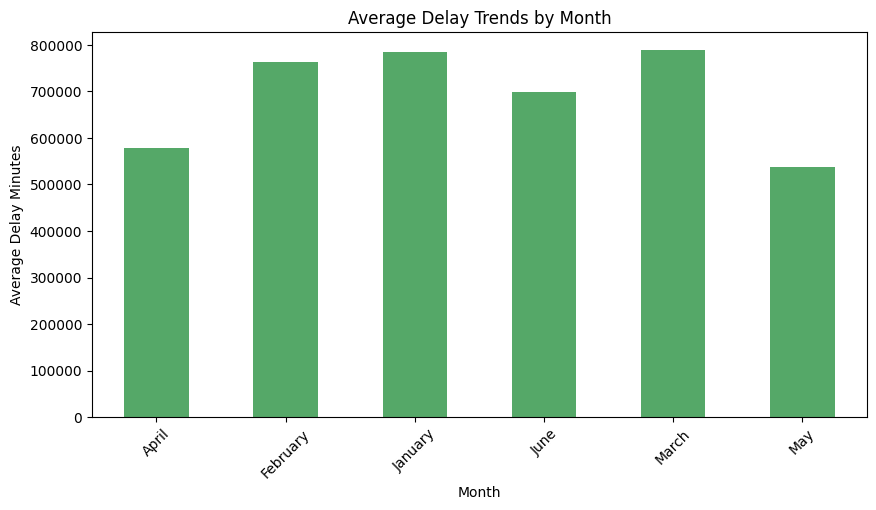

In [0]:
# If dataset has cancellation data
if df['Cancelled'].sum() > 0:
    monthly_cancellation = df[df['Cancelled'] == 1].groupby('Month')['Cancelled'].count().reindex(
        df['Month'].unique(), fill_value=0
    )

    monthly_cancellation.plot(
        kind='bar',
        figsize=(10,5),
        color='#4C72B0',
        title='Monthly Cancellation Trends',
        ylabel='Number of Cancellations',
        xlabel='Month'
    )
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ No cancellation data available. Showing monthly delay trends instead.")
    monthly_delay = (
        df.groupby('Month')[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay']]
        .sum()
        .mean(axis=1)
    )
    monthly_delay.plot(
        kind='bar',
        figsize=(10,5),
        color='#55A868',
        title='Average Delay Trends by Month',
        ylabel='Average Delay Minutes',
        xlabel='Month'
    )
    plt.xticks(rotation=45)
    plt.show()


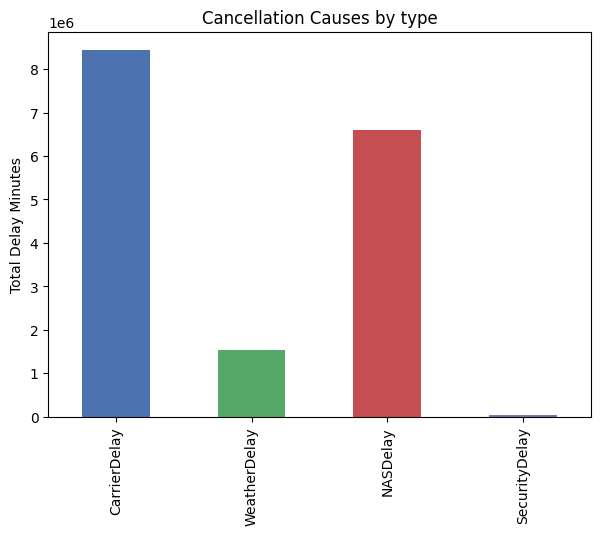

In [0]:
if df['Cancelled'].sum() > 0:
    cancel_types = df[df['Cancelled'] == 1]['CancellationCode'].value_counts()
    cancel_types.plot(
        kind='bar',
        color=['#4C72B0','#55A868','#C44E52','#8172B2'],
        figsize=(7,5),
        title='Cancellation Types (Carrier / Weather / NAS / Security)',
        ylabel='Number of Cancellations'
    )
    plt.show()
else:
    delay_causes = df[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay']].sum()
    delay_causes.plot(
        kind='bar',
        color=['#4C72B0','#55A868','#C44E52','#8172B2'],
        figsize=(7,5),
        title='Cancellation Causes by type',
        ylabel='Total Delay Minutes'
    )
    plt.show()


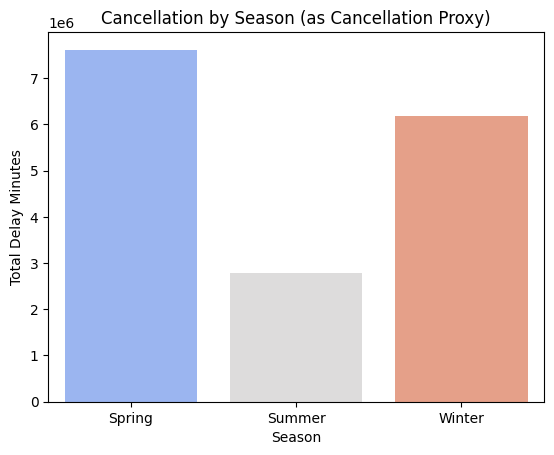

In [0]:
# Define seasons manually (for Northern Hemisphere)
def season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month_Num'].apply(season)

if df['Cancelled'].sum() > 0:
    season_cancel = df[df['Cancelled']==1].groupby('Season').size()
    sns.barplot(x=season_cancel.index, y=season_cancel.values, palette='coolwarm')
    plt.title('Cancellations by Season')
    plt.ylabel('Number of Cancellations')
    plt.show()
else:
    season_delay = df.groupby('Season')[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay']].sum().sum(axis=1)
    sns.barplot(x=season_delay.index, y=season_delay.values, palette='coolwarm')
    plt.title('Cancellation by Season (as Cancellation Proxy)')
    plt.ylabel('Total Delay Minutes')
    plt.show()


/home/spark-e6e14f57-313d-4b51-9ec6-fd/.ipykernel/2488/command-5770524344852470-4168602274:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_delay.index, y=holiday_delay.values, palette='muted')


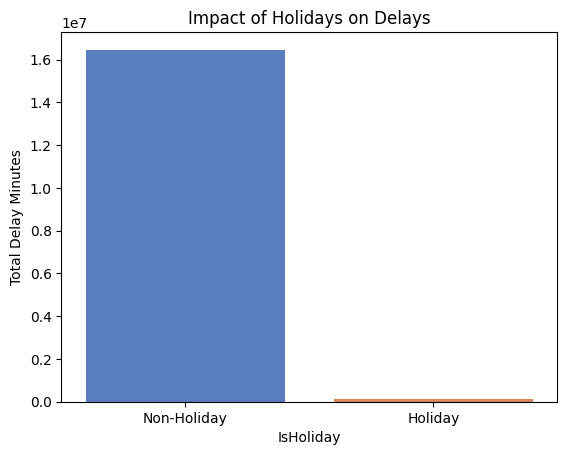

In [0]:
# Define major US holidays (you can change if dataset is Indian)
holidays = ['01-01', '07-04', '12-25', '11-25']  # New Year, Independence Day, Christmas, Thanksgiving
df['IsHoliday'] = df['Date'].dt.strftime('%m-%d').isin(holidays)

if df['Cancelled'].sum() > 0:
    holiday_cancel = df.groupby('IsHoliday')['Cancelled'].sum()
    sns.barplot(x=holiday_cancel.index, y=holiday_cancel.values, palette='muted')
    plt.title('Impact of Holidays on Cancellations')
    plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
    plt.ylabel('Number of Cancellations')
    plt.show()
else:
    holiday_delay = df.groupby('IsHoliday')[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay']].sum().sum(axis=1)
    sns.barplot(x=holiday_delay.index, y=holiday_delay.values, palette='muted')
    plt.title('Impact of Holidays on Delays')
    plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
    plt.ylabel('Total Delay Minutes')
    plt.show()


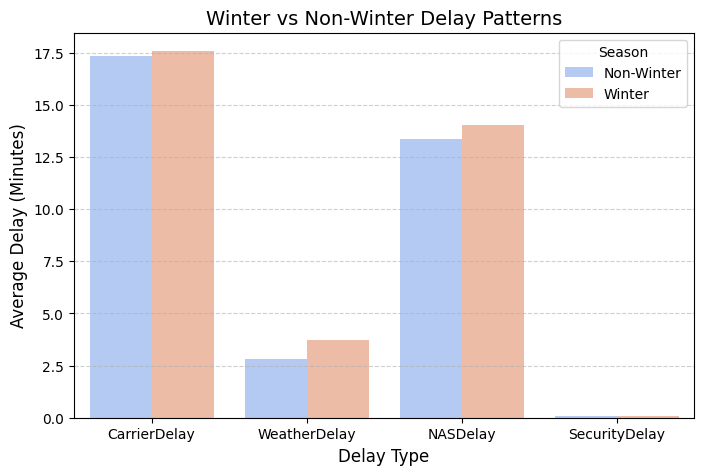

In [0]:

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure correct month extraction
df['Date'] = pd.to_datetime(df['Date'])
df['Month_Num'] = df['Date'].dt.month

# Define Winter and Non-Winter
df['SeasonType'] = df['Month_Num'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Non-Winter')

# Calculate average delays by type for Winter vs Non-Winter
winter_pattern = (
    df.groupby('SeasonType')[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay']]
    .mean()
    .reset_index()
)

# Melt the data for better visualization (long format)
winter_melt = winter_pattern.melt(id_vars='SeasonType', var_name='DelayType', value_name='AvgDelayMinutes')

# Plot the comparison
plt.figure(figsize=(8,5))
sns.barplot(data=winter_melt, x='DelayType', y='AvgDelayMinutes', hue='SeasonType', palette='coolwarm')
plt.title('Winter vs Non-Winter Delay Patterns', fontsize=14)
plt.xlabel('Delay Type', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.legend(title='Season')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


/home/spark-e6e14f57-313d-4b51-9ec6-fd/.ipykernel/2488/command-5770524344852472-3757318532:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_summary.index, y=risk_summary.values, palette='coolwarm')


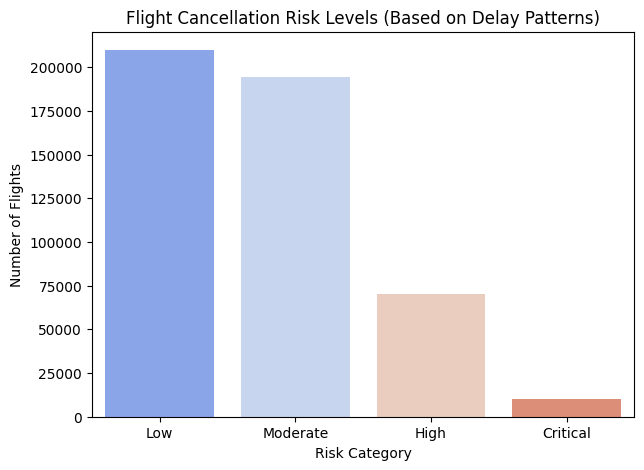

In [0]:
# Create a "CancellationRisk" feature based on total delay
df['TotalDelay'] = df[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay']].sum(axis=1)

# Categorize risk (like cancellation likelihood)
df['CancellationRisk'] = pd.cut(
    df['TotalDelay'],
    bins=[-1, 15, 60, 180, 10000],
    labels=['Low', 'Moderate', 'High', 'Critical']
)

risk_summary = df['CancellationRisk'].value_counts().sort_index()
plt.figure(figsize=(7,5))
sns.barplot(x=risk_summary.index, y=risk_summary.values, palette='coolwarm')
plt.title('Flight Cancellation Risk Levels (Based on Delay Patterns)')
plt.xlabel('Risk Category')
plt.ylabel('Number of Flights')
plt.show()


/home/spark-e6e14f57-313d-4b51-9ec6-fd/.ipykernel/2488/command-5770524344852473-1336704457:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_risk = df.groupby(['Month', 'CancellationRisk']).size().unstack(fill_value=0)


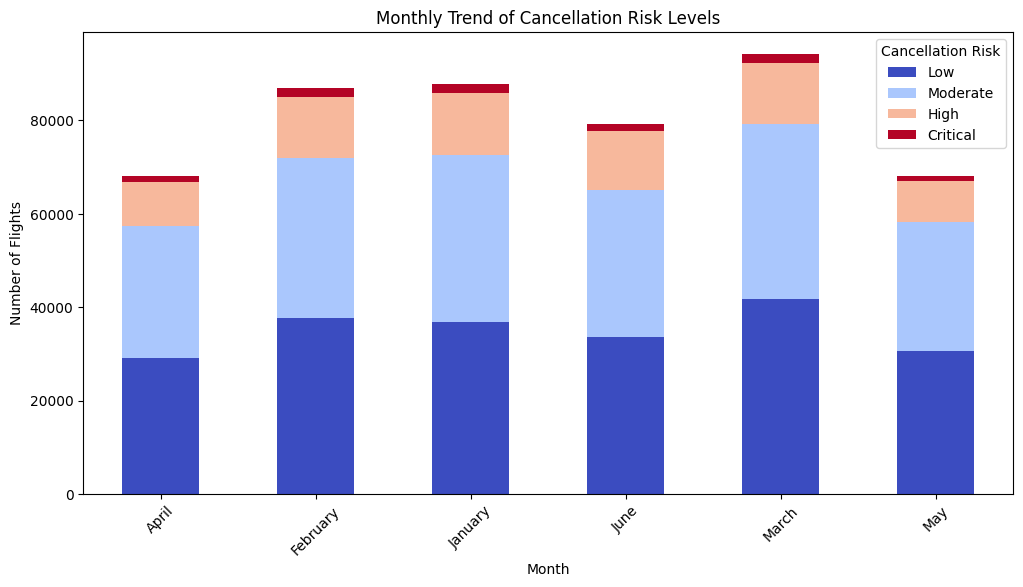

In [0]:
monthly_risk = df.groupby(['Month', 'CancellationRisk']).size().unstack(fill_value=0)
monthly_risk.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title('Monthly Trend of Cancellation Risk Levels')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.legend(title='Cancellation Risk')
plt.xticks(rotation=45)
plt.show()


/home/spark-e6e14f57-313d-4b51-9ec6-fd/.ipykernel/2488/command-5770524344852474-928806680:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=route_delay.values, y=route_delay.index, palette='Reds_r')


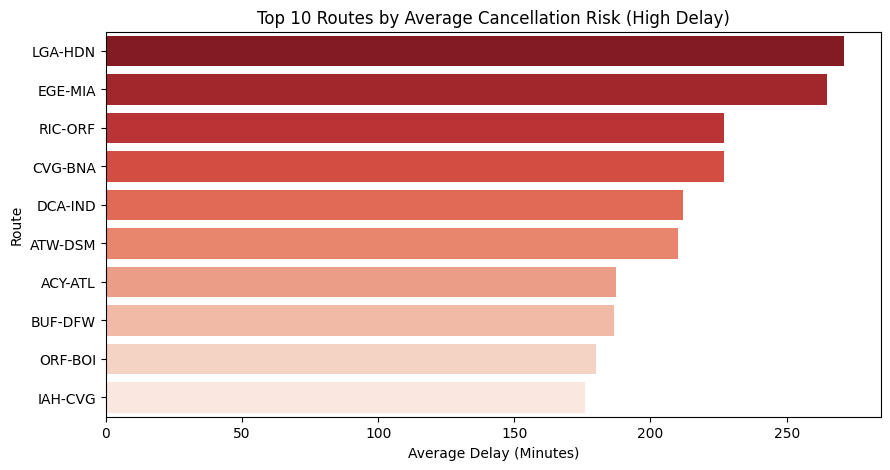

In [0]:
route_delay = df.groupby('Route')['TotalDelay'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=route_delay.values, y=route_delay.index, palette='Reds_r')
plt.title('Top 10 Routes by Average Cancellation Risk (High Delay)')
plt.xlabel('Average Delay (Minutes)')
plt.ylabel('Route')
plt.show()


/home/spark-e6e14f57-313d-4b51-9ec6-fd/.ipykernel/2488/command-5770524344852475-1058630386:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=airline_risk.values, y=airline_risk.index, palette='crest')


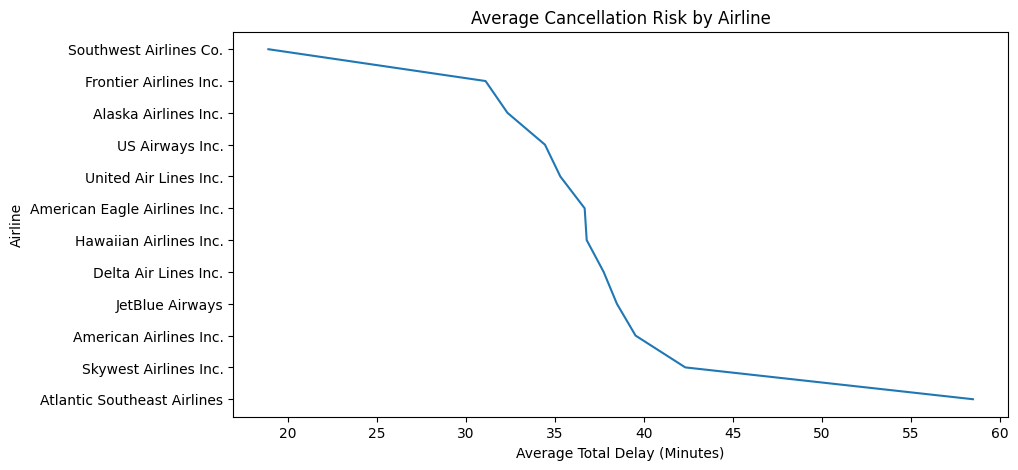

In [0]:
airline_risk = df.groupby('Airline')['TotalDelay'].mean().sort_values()
plt.figure(figsize=(10,5))
sns.lineplot(x=airline_risk.values, y=airline_risk.index, palette='crest')
plt.title('Average Cancellation Risk by Airline')
plt.xlabel('Average Total Delay (Minutes)')
plt.ylabel('Airline')
plt.show()


/home/spark-e6e14f57-313d-4b51-9ec6-fd/.ipykernel/2488/command-5770524344852476-31994846:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_risk.index, y=dow_risk.values, palette='coolwarm')


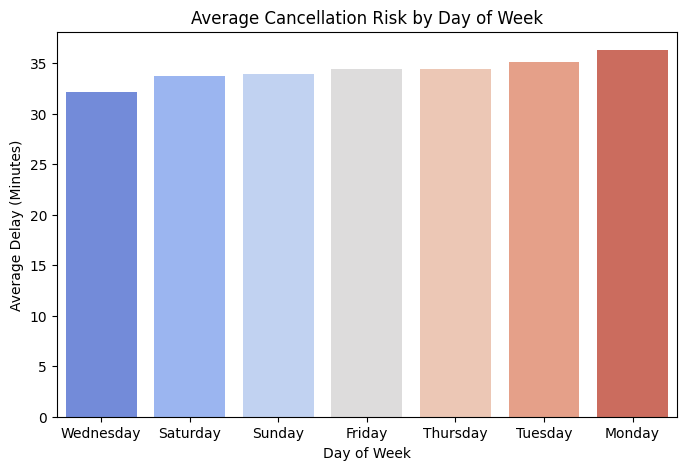

In [0]:
dow_risk = df.groupby('DayOfWeek')['TotalDelay'].mean().sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=dow_risk.index, y=dow_risk.values, palette='coolwarm')
plt.title('Average Cancellation Risk by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Delay (Minutes)')
plt.show()


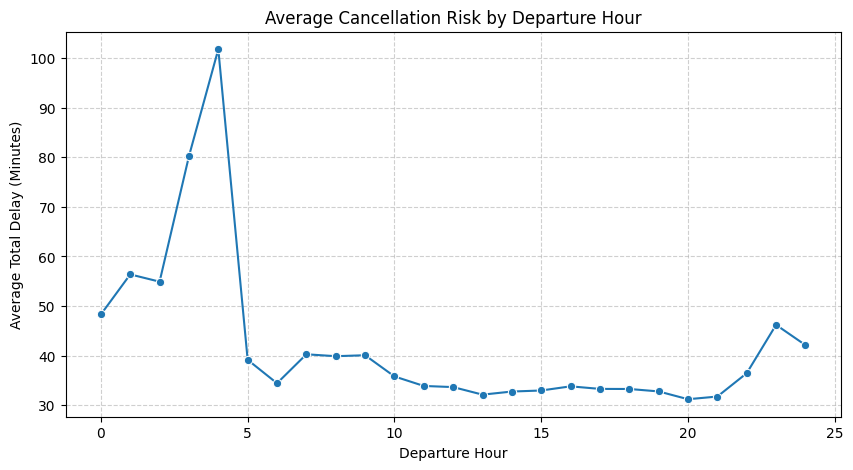

In [0]:
hourly_risk = df.groupby('DepHour')['TotalDelay'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_risk.index, y=hourly_risk.values, marker='o')
plt.title('Average Cancellation Risk by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Average Total Delay (Minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


/home/spark-e6e14f57-313d-4b51-9ec6-fd/.ipykernel/2488/command-5770524344852478-1679223795:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=season_risk.index, y=season_risk.values, palette='Blues_r')


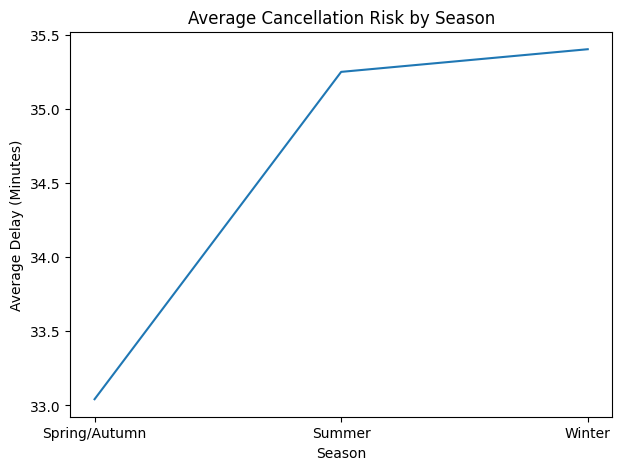

In [0]:
df['Season'] = df['Month_Num'].apply(lambda x: 'Winter' if x in [12,1,2]
                                    else 'Summer' if x in [6,7,8]
                                    else 'Spring/Autumn')
season_risk = df.groupby('Season')['TotalDelay'].mean().sort_values()
plt.figure(figsize=(7,5))
sns.lineplot(x=season_risk.index, y=season_risk.values, palette='Blues_r')
plt.title('Average Cancellation Risk by Season')
plt.xlabel('Season')
plt.ylabel('Average Delay (Minutes)')
plt.show()


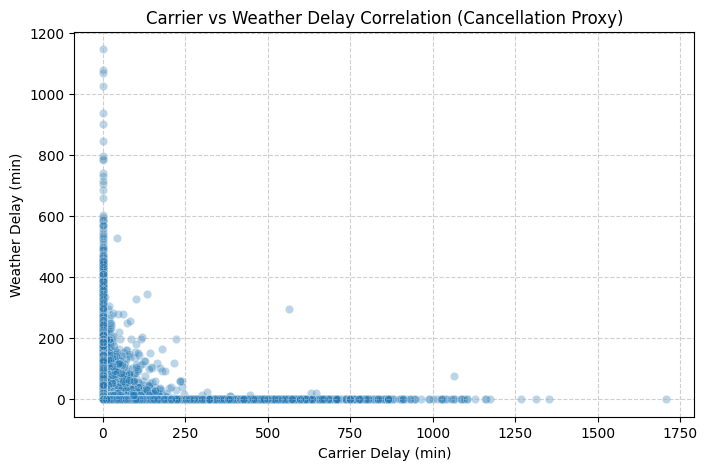

In [0]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['CarrierDelay'], y=df['WeatherDelay'], alpha=0.3)
plt.title('Carrier vs Weather Delay Correlation (Cancellation Proxy)')
plt.xlabel('Carrier Delay (min)')
plt.ylabel('Weather Delay (min)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [0]:
summary = df[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','TotalDelay']].mean().to_frame('AvgMinutes')
summary['% of Total Delay'] = (summary['AvgMinutes']/summary.loc['TotalDelay','AvgMinutes']*100).round(2)
summary.drop('TotalDelay', inplace=True)
display(summary)


AvgMinutes,% of Total Delay
17.41943985256454,50.85
3.1532841744212683,9.21
13.599420907190368,39.7
0.08203264465453584,0.24


In [0]:
# Basic cancellation & delay statistics
print("===== FLIGHT CANCELLATION AND DELAY STATISTICS =====")
print(f"Total Flights: {len(df)}")

# Cancellation counts
print("\n--- Cancellation Summary ---")
if 'Cancelled' in df.columns:
    print(df['Cancelled'].value_counts(normalize=True) * 100)
else:
    print("No cancellation data available in the dataset.")

# Delay overview
print("\n--- Delay Overview (in minutes) ---")
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for col in delay_cols:
    if col in df.columns:
        print(f"{col}: Mean={df[col].mean():.2f}, Median={df[col].median()}, Max={df[col].max()}, Std={df[col].std():.2f}")


===== FLIGHT CANCELLATION AND DELAY STATISTICS =====
Total Flights: 484551

--- Cancellation Summary ---
Cancelled
0    100.0
Name: proportion, dtype: float64

--- Delay Overview (in minutes) ---
CarrierDelay: Mean=17.42, Median=2.0, Max=1707, Std=39.42
WeatherDelay: Mean=3.15, Median=0.0, Max=1148, Std=19.50
NASDelay: Mean=13.60, Median=1.0, Max=1357, Std=31.45
SecurityDelay: Mean=0.08, Median=0.0, Max=392, Std=1.88
LateAircraftDelay: Mean=26.65, Median=13.0, Max=1254, Std=40.54


In [0]:
# Convert Date column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()

# Monthly average delay
print("\n===== AVERAGE DELAY BY MONTH =====")
monthly_delay = df.groupby('Month')[['ArrDelay', 'DepDelay']].mean().sort_values('ArrDelay', ascending=False)
print(monthly_delay.round(2))



===== AVERAGE DELAY BY MONTH =====
          ArrDelay  DepDelay
Month                       
February     63.61     59.84
June         63.30     59.35
January      63.04     59.40
March        59.25     56.39
April        58.24     54.95
May          56.88     53.98


In [0]:
# Define winter and non-winter months
winter_months = ['December', 'January', 'February']
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in winter_months else 'Non-Winter')

# Compare delay statistics
print("\n===== WINTER VS NON-WINTER DELAY ANALYSIS =====")
seasonal_stats = df.groupby('Season')[['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay']].mean()
print(seasonal_stats.round(2))

# Count number of flights per season
print("\nNumber of Flights per Season:")
print(df['Season'].value_counts())



===== WINTER VS NON-WINTER DELAY ANALYSIS =====
            ArrDelay  DepDelay  CarrierDelay  WeatherDelay  NASDelay
Season                                                              
Non-Winter     59.54     56.30         17.33          2.83     13.37
Winter         63.32     59.62         17.58          3.72     14.01

Number of Flights per Season:
Season
Non-Winter    309672
Winter        174879
Name: count, dtype: int64


In [0]:
print("\n===== AIRLINE DELAY PERFORMANCE =====")
airline_delay = df.groupby('Airline')[['ArrDelay', 'DepDelay']].mean().sort_values('ArrDelay', ascending=False)
print(airline_delay.round(2).head(20))



===== AIRLINE DELAY PERFORMANCE =====
                              ArrDelay  DepDelay
Airline                                         
JetBlue Airways                  72.87     68.28
United Air Lines Inc.            69.67     66.37
American Airlines Inc.           65.73     60.31
Skywest Airlines Inc.            65.19     60.37
American Eagle Airlines Inc.     64.28     57.82
Atlantic Southeast Airlines      63.21     61.38
Delta Air Lines Inc.             59.29     52.86
US Airways Inc.                  58.45     56.03
Alaska Airlines Inc.             57.56     55.16
Hawaiian Airlines Inc.           55.66     52.75
Southwest Airlines Co.           51.03     51.25
Frontier Airlines Inc.           41.97     36.50


In [0]:
print("\n===== ROUTE LEVEL DELAY ANALYSIS =====")
route_delay = df.groupby('Route')[['ArrDelay', 'DepDelay']].mean().sort_values('ArrDelay', ascending=False)
print(route_delay.round(2).head(10))



===== ROUTE LEVEL DELAY ANALYSIS =====
         ArrDelay  DepDelay
Route                      
EGE-MIA    320.44    289.56
DCA-IND    299.00    308.00
IND-DCA    273.00    286.00
LGA-HDN    271.00    233.00
HDN-LGA    265.00    258.00
CVG-BNA    227.00    238.50
RIC-ORF    227.00    205.00
ATW-DSM    210.00    185.00
ACY-ATL    187.50    195.80
BUF-DFW    186.71    178.86


In [0]:
print("\n===== DELAY CONTRIBUTION BY TYPE =====")
delay_sums = df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum()
delay_percent = (delay_sums / delay_sums.sum()) * 100
print(delay_percent.round(2).sort_values(ascending=False))



===== DELAY CONTRIBUTION BY TYPE =====
LateAircraftDelay    43.76
CarrierDelay         28.60
NASDelay             22.33
WeatherDelay          5.18
SecurityDelay         0.13
dtype: float64


In [0]:
print("\n===== MOST COMMON DELAY CAUSE PER AIRLINE =====")
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

for airline, data in df.groupby('Airline'):
    sums = data[delay_cols].sum()
    main_cause = sums.idxmax()
    print(f"{airline}: Major Cause -> {main_cause} ({sums[main_cause]} total minutes)")



===== MOST COMMON DELAY CAUSE PER AIRLINE =====
Alaska Airlines Inc.: Major Cause -> LateAircraftDelay (252070 total minutes)
American Airlines Inc.: Major Cause -> LateAircraftDelay (1913147 total minutes)
American Eagle Airlines Inc.: Major Cause -> LateAircraftDelay (1619665 total minutes)
Atlantic Southeast Airlines: Major Cause -> CarrierDelay (963694 total minutes)
Delta Air Lines Inc.: Major Cause -> LateAircraftDelay (650996 total minutes)
Frontier Airlines Inc.: Major Cause -> NASDelay (140782 total minutes)
Hawaiian Airlines Inc.: Major Cause -> CarrierDelay (52431 total minutes)
JetBlue Airways: Major Cause -> LateAircraftDelay (528161 total minutes)
Skywest Airlines Inc.: Major Cause -> LateAircraftDelay (1151441 total minutes)
Southwest Airlines Co.: Major Cause -> LateAircraftDelay (3822267 total minutes)
US Airways Inc.: Major Cause -> LateAircraftDelay (762101 total minutes)
United Air Lines Inc.: Major Cause -> LateAircraftDelay (1954564 total minutes)


In [0]:
import datetime as dt

# Define major US holidays roughly
holidays = [
    (1, 1),     # New Year
    (7, 4),     # Independence Day
    (12, 25),   # Christmas
    (11, 25),   # Thanksgiving (approx)
]

df['IsHoliday'] = df['Date'].apply(lambda x: (x.month, x.day) in holidays)

print("\n===== HOLIDAY VS NON-HOLIDAY DELAY STATS =====")
holiday_stats = df.groupby('IsHoliday')[['ArrDelay', 'DepDelay']].mean()
print(holiday_stats.round(2))



===== HOLIDAY VS NON-HOLIDAY DELAY STATS =====
           ArrDelay  DepDelay
IsHoliday                    
False         60.88     57.48
True          64.02     60.28
